In [1]:
%matplotlib inline

import math
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

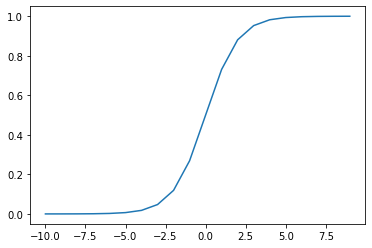

In [2]:
## Here is the logistic function, the activation function for logistic regression

def logistic(z):
    return 1/(1 + np.exp(-z))

x, fz = [], []
for z in range(-10, 10):
    x.append(z)
    fz.append(logistic(z))

plt.plot(x, fz)

1. What is the domain of the logistic function? 

[Type your answer here]

2. What is the range of the logistic function?

[Type your answer here]

3. Why do you think the logistic function might be a convenient activation function for modeling probabilities?

[Type your answer here]

4. What is the denominator when z is very big? How about when z is very small?

[Type your answer here]

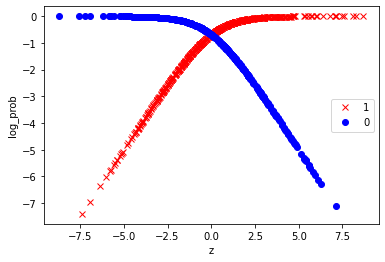

In [3]:
## Let's generate some features, weights and y values and compute the loss 
## This can help you build up intuition for what is happening

def log_prob(z, y_i):
    '''
    Returns the log_prob for one point
    '''
    fz = logistic(z)
    return y_i * np.log(fz) + (1 - y_i) * np.log(1 - fz)


out = []

dim_ = 10

for _ in range(1000):
    # generate some random weights 
    w = np.random.uniform(low=-2, high=2, size=dim_)
    
    # generate some random binary features 
    x = (np.random.rand(dim_) > .5).astype(int) 
    
    # get the z score
    z = w.dot(x)

    # randomly assign y
    y = 1 if random.random() < .5 else 0
    
    # compute the loss
    loss = log_prob(z=z, y_i=y)
    
    # keep track of what is happening
    out.append({"z": z, "loss": loss, "label": y})


# Plot the results
df = pd.DataFrame(out)
    
fig, ax = plt.subplots()
ax.plot(df[df["label"] == 1]["z"], df[df["label"] == 1]["loss"], 'x', color="red", label='1')
ax.plot(df[df["label"] == 0]["z"], df[df["label"] == 0]["loss"], 'o', color="blue", label='0')
plt.xlabel("z")
plt.ylabel("log_prob")
plt.legend()
plt.show()

5. What is the log_prob when y=1 and z=-.25? Why does that make sense?

[Type your answer here]

6. What is the log_prob when y=0 and z=-.25? Why does that make sense?

[Type your answer here]

7 . Why is the log_prob always negative? 

[Type your answer here]

In [11]:
def neg_log_likelihood(X, w, y):
    '''Compute the negative log likelihood'''
    L = 0
    for _x,_y in zip(X, y):
        z = w.dot(_x)
        L += log_prob(z=z, y_i=_y)
    return -1 * L


def fast_logistic(X, w):
    '''Compute the logistic function over many datapoints'''
    return 1/(1 + np.exp(-1 * X.dot(w)))


def grad(X, w, y):
    '''Return the gradient'''
    grad = np.zeros_like(w)
    for _x,_y in zip(X, y):
        fz = logistic(w.dot(_x))
        grad += _x * (_y - fz)
    return grad    

def grad_ascent(X, y, eta = .0001, tolerance=1e-4, verbose=True):
    '''Perform gradient ascent'''
    w = np.random.rand(dim_)
    last = 0
    for i in range(100000):
        this_ll = neg_log_likelihood(X, w, y)
        if verbose:
            print("iter: {}, neg ll {}, accuracy {}".format(i, this_ll, accuracy(X, w, y)))
        if accuracy(X, w, y) == 1: break
        if(abs(this_ll - last) < tolerance): break
        last = this_ll
        w += eta * grad(X, w, y)
    return w

def prediction(X, w, threshold=.5):
    #return 0
    return fast_logistic(X, w) > threshold

def accuracy(X, w, y):
    # return 0
    return np.mean(prediction(X, w) == y)

def init_data(N, dim_):
    '''
    Initialize data. Note how we generate y below. We know how the data is generated.
    We should be able to 
    '''
    w = np.random.uniform(low=-2, high=2, size=dim_)
    X = (np.random.rand(dim_ * N) > .5).astype(int)
    X = X.reshape(N, dim_)

    z_ = X[:,0] * 2 +  X[:,1] * -2 +  X[:,2] * 3 + X[:,3] * 4

    y =  1/(1 + np.exp(-1 * z_)) > .5
    
    return X, y

N = 10000
dim_ = 4
X, y = init_data(N, dim_)
w = grad_ascent(X, y, eta=.0001, tolerance=1e-2, verbose=True)

iter: 0, neg ll 3964.014956173719, accuracy 0.8775
iter: 1, neg ll 3745.1115171690253, accuracy 0.8775
iter: 2, neg ll 3573.5029821544235, accuracy 0.8775
iter: 3, neg ll 3432.9986095668687, accuracy 0.8775
iter: 4, neg ll 3314.092082583764, accuracy 0.8775
iter: 5, neg ll 3210.8755639686574, accuracy 0.8775
iter: 6, neg ll 3119.5015177927885, accuracy 0.8775
iter: 7, neg ll 3037.363463869521, accuracy 0.8775
iter: 8, neg ll 2962.6347865852, accuracy 0.8775
iter: 9, neg ll 2893.9967426021867, accuracy 0.8775
iter: 10, neg ll 2830.4716047347965, accuracy 0.8775
iter: 11, neg ll 2771.3168002953607, accuracy 0.8775
iter: 12, neg ll 2715.9557726185726, accuracy 0.8775
iter: 13, neg ll 2663.9316753466437, accuracy 0.8775
iter: 14, neg ll 2614.8756668588576, accuracy 0.8775
iter: 15, neg ll 2568.484772910023, accuracy 0.8775
iter: 16, neg ll 2524.506156984023, accuracy 0.9401
iter: 17, neg ll 2482.7257647308, accuracy 0.9401
iter: 18, neg ll 2442.960005492553, accuracy 0.9401
iter: 19, neg l

In [12]:
%timeit grad_ascent(X, y, eta=.0001, tolerance=1e-2, verbose=False)

10.8 s ± 560 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
prediction(X, w)

array([ True,  True,  True, ...,  True,  True,  True])

Implement the accuracy function
Implement the prediction function



Is stochastic grad ascent faster?
What is the advantage of stoch grad? 
Print out the weigts you learn. Look at init_data, z_. Why do the signs of the weights make sense?
Why are the magnitudes of the weights and the 